In [1]:
# Importation des packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv')
df['Publisher'] = df['Publisher'].fillna('unknown')
df=df.fillna(0)
df.drop(df.loc[df['Global_Sales']==0].index, inplace=True)
df.drop(df.loc[df['metaNote']==0].index, inplace=True)
df.drop(df.loc[df['samename']==0].index, inplace=True)

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,developper,gamename,metaNote,metaNbVote,userNote,userNbVote,serie,samename,metaNoteQ,serieB
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,Nintendo,Wii Sports,76.0,51.0,8.1,453.0,Wii Series,1,4,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,Nintendo,Classic NES Series: Super Mario Bros.,84.0,14.0,8.5,98.0,Mario Series,1,4,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,Nintendo,Mario Kart Wii,82.0,73.0,8.4,1047.0,0,1,4,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,...,Nintendo,Wii Sports Resort,80.0,73.0,8.2,293.0,Wii Sports,1,4,1
4,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,...,Nintendo,Tetris 99,83.0,27.0,8.2,258.0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11535,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.00,...,Ubisoft Montreal,Myst IV: Revelation,82.0,36.0,0.0,0.0,Myst,1,4,1
11536,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,...,Big John Games,Plushees,1.0,3.0,0.0,0.0,0,1,1,0
11537,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,...,Melbourne House,Men in Black II: Alien Escape,50.0,19.0,0.0,0.0,0,1,3,0
11538,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,...,Left Field Productions,SCORE International Baja 1000,29.0,4.0,0.0,0.0,0,1,2,0


In [4]:

# Duplication de df dans df_visu pour les visualisations
df_visu = df



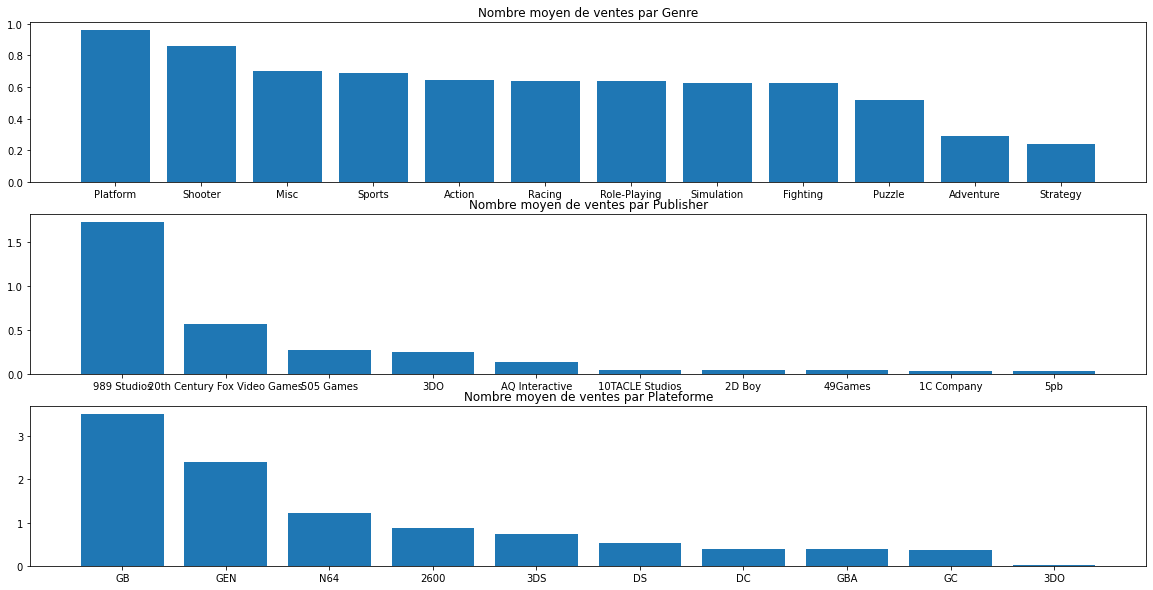

In [5]:
# Visualisation

# Ventes par genre 
salesByGenre = df_visu.groupby('Genre').agg({'Global_Sales':'mean'}).sort_values(by='Global_Sales',ascending=False)

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
#plt.hist()
plt.bar(salesByGenre['Global_Sales'].index,salesByGenre['Global_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes par Genre');

# Ventes par éditeur
plt.subplot(3,1,2)
salesByPublisher = df_visu.groupby('Publisher').agg({'Global_Sales':'mean'}).head(10).sort_values(by='Global_Sales',ascending=False)
#salesByPublisher
plt.bar(salesByPublisher['Global_Sales'].index,salesByPublisher['Global_Sales']);
plt.title('Nombre moyen de ventes par Publisher');

# Ventes par plateforme
plt.subplot(3,1,3)
salesByPlatform = df_visu.groupby('Platform').agg({'Global_Sales':'mean'}).head(10).sort_values(by='Global_Sales',ascending=False)
#salesByPublisher
plt.bar(salesByPlatform['Global_Sales'].index,salesByPlatform['Global_Sales']);
plt.title('Nombre moyen de ventes par Plateforme');

# Ventes

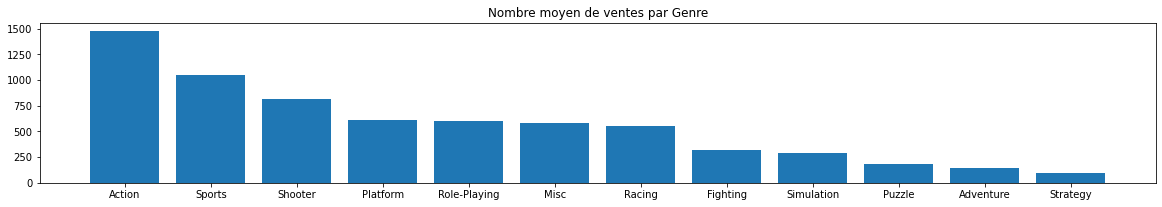

In [6]:
salesByGenre2 = df_visu.groupby('Genre').agg({'Global_Sales':'sum','Global_Sales':'sum'}).sort_values(by='Global_Sales',ascending=False)

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
#plt.hist()
plt.bar(salesByGenre2['Global_Sales'].index,salesByGenre2['Global_Sales']);
#plt.bar(df.Genre,df.Global_Sales.mean());
plt.title('Nombre moyen de ventes par Genre');

In [7]:
%matplotlib inline

from bokeh.models.tools import HoverTool
from bokeh.models import ColumnDataSource
df_visu['metaNote']=df_visu['metaNote'].astype(float)

In [8]:
salesByGenre_NA = df_visu.groupby('Genre').agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales',ascending=False)
salesByGenre_EU = df_visu.groupby('Genre').agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales',ascending=False)
salesByGenre_JP = df_visu.groupby('Genre').agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales',ascending=False)
salesByGenre_OT = df_visu.groupby('Genre').agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales',ascending=False)


salesByGenre_EU = df_visu.groupby('Genre').agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales',ascending=False)
salesByGenre_JP = df_visu.groupby('Genre').agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales',ascending=False)
salesByGenre_OT = df_visu.groupby('Genre').agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales',ascending=False)

salesByPublisher_NA = df_visu.groupby('Publisher').agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales',ascending=False)
salesByPublisher_EU = df_visu.groupby('Publisher').agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales',ascending=False)
salesByPublisher_JP = df_visu.groupby('Publisher').agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales',ascending=False)
salesByPublisher_OT = df_visu.groupby('Publisher').agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales',ascending=False)

salesByDev_NA = df_visu.groupby('developper').agg({'NA_Sales':'sum'}).sort_values(by='NA_Sales',ascending=False)
salesByDev_EU = df_visu.groupby('developper').agg({'EU_Sales':'sum'}).sort_values(by='EU_Sales',ascending=False)
salesByDev_JP = df_visu.groupby('developper').agg({'JP_Sales':'sum'}).sort_values(by='JP_Sales',ascending=False)
salesByDev_OT = df_visu.groupby('developper').agg({'Other_Sales':'sum'}).sort_values(by='Other_Sales',ascending=False)

salesByName = df_visu.groupby('Name').agg({'Global_Sales':'sum','metaNote':'mean','Publisher':'last','Genre':'last'})\
.sort_values(by='Global_Sales',ascending=False)

In [9]:
salesByGenre_global = df_visu.groupby('Genre')\
.agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'})\
.sort_values(by='Global_Sales',ascending=False)

salesByGenre_global['NA_Ratio']=salesByGenre_global['NA_Sales']/salesByGenre_global['NA_Sales'].sum()*100
salesByGenre_global['EU_Ratio']=salesByGenre_global['EU_Sales']/salesByGenre_global['EU_Sales'].sum()*100
salesByGenre_global['JP_Ratio']=salesByGenre_global['JP_Sales']/salesByGenre_global['JP_Sales'].sum()*100
salesByGenre_global['OT_Ratio']=salesByGenre_global['Other_Sales']/salesByGenre_global['Other_Sales'].sum()*100


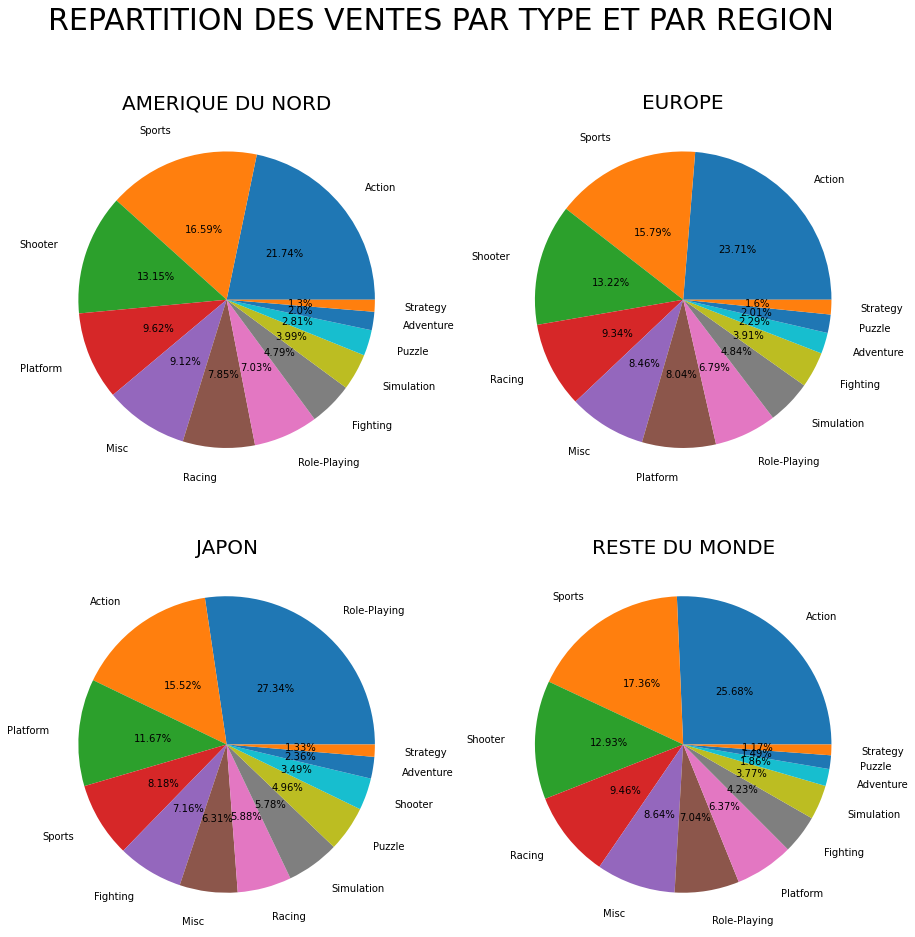

In [10]:
plt.figure(figsize = (15,15))

plt.subplot(221)
plt.pie(x = salesByGenre_NA.NA_Sales, labels = salesByGenre_NA.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 1.2,
           shadow = 0)
plt.title('AMERIQUE DU NORD',fontsize=20)
plt.subplot(222)
plt.pie(x = salesByGenre_EU.EU_Sales, labels = salesByGenre_EU.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 1.2,
           shadow = 0)
plt.title('EUROPE',fontsize=20)
plt.subplot(223)
plt.pie(x = salesByGenre_JP.JP_Sales, labels = salesByGenre_JP.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 1.2,
           shadow = 0)
plt.title('JAPON',fontsize=20)
plt.subplot(224)
plt.pie(x = salesByGenre_OT.Other_Sales, labels = salesByGenre_OT.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 1.2,
           shadow = 0)
plt.title('RESTE DU MONDE',fontsize=20)
plt.suptitle('REPARTITION DES VENTES PAR TYPE ET PAR REGION',fontsize=30)
plt.show()

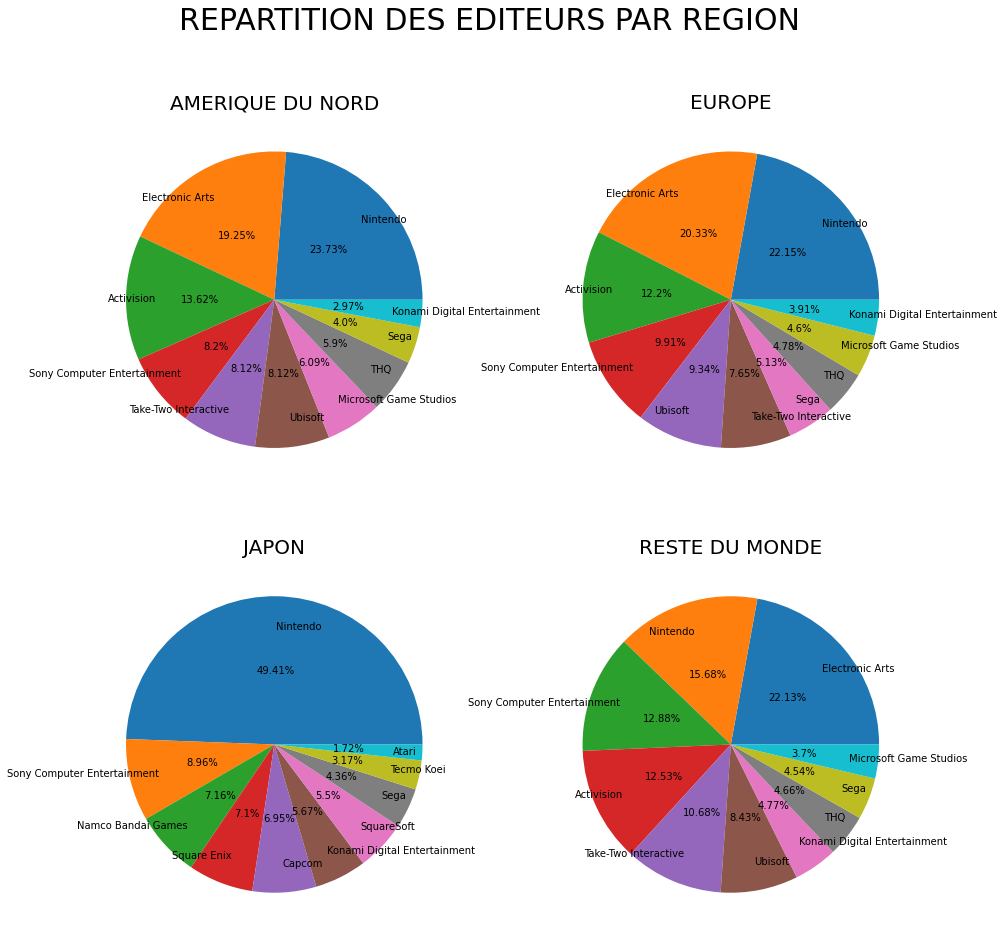

In [11]:
salesByPublisher_NA = salesByPublisher_NA.head(10)
salesByPublisher_EU = salesByPublisher_EU.head(10)
salesByPublisher_JP = salesByPublisher_JP.head(10)
salesByPublisher_OT = salesByPublisher_OT.head(10)
plt.figure(figsize = (15,15))

plt.subplot(221)
plt.pie(x = salesByPublisher_NA.NA_Sales, labels = salesByPublisher_NA.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('AMERIQUE DU NORD',fontsize=20)
plt.subplot(222)
plt.pie(x = salesByPublisher_EU.EU_Sales, labels = salesByPublisher_EU.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('EUROPE',fontsize=20)
plt.subplot(223)
plt.pie(x = salesByPublisher_JP.JP_Sales, labels = salesByPublisher_JP.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('JAPON',fontsize=20)
plt.subplot(224)
plt.pie(x = salesByPublisher_OT.Other_Sales, labels = salesByPublisher_OT.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('RESTE DU MONDE',fontsize=20)
plt.suptitle('REPARTITION DES EDITEURS PAR REGION',fontsize=30)
plt.show()

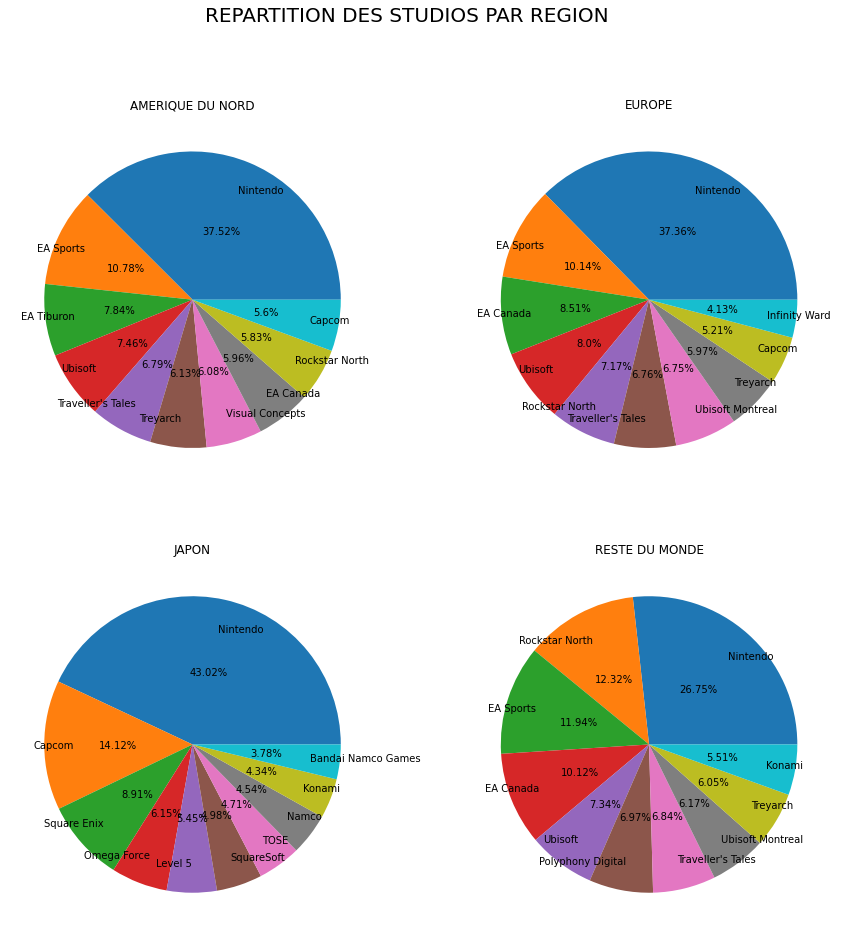

In [12]:
salesByDev_NA = salesByDev_NA.head(10)
salesByDev_EU = salesByDev_EU.head(10)
salesByDev_JP = salesByDev_JP.head(10)
salesByDev_OT = salesByDev_OT.head(10)
plt.figure(figsize = (15,15))

plt.subplot(221)
plt.pie(x = salesByDev_NA.NA_Sales, labels = salesByDev_NA.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('AMERIQUE DU NORD')
plt.subplot(222)
plt.pie(x = salesByDev_EU.EU_Sales, labels = salesByDev_EU.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('EUROPE')
plt.subplot(223)
plt.pie(x = salesByDev_JP.JP_Sales, labels = salesByDev_JP.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('JAPON')
plt.subplot(224)
plt.pie(x = salesByDev_OT.Other_Sales, labels = salesByDev_OT.index,
           autopct = lambda x: str(round(x, 2)) + '%',
           #autopct = lambda x: x,
           pctdistance = 0.5, labeldistance = 0.8,
           shadow = 0)
plt.title('RESTE DU MONDE')
plt.suptitle('REPARTITION DES STUDIOS PAR REGION',fontsize=20)
plt.show()


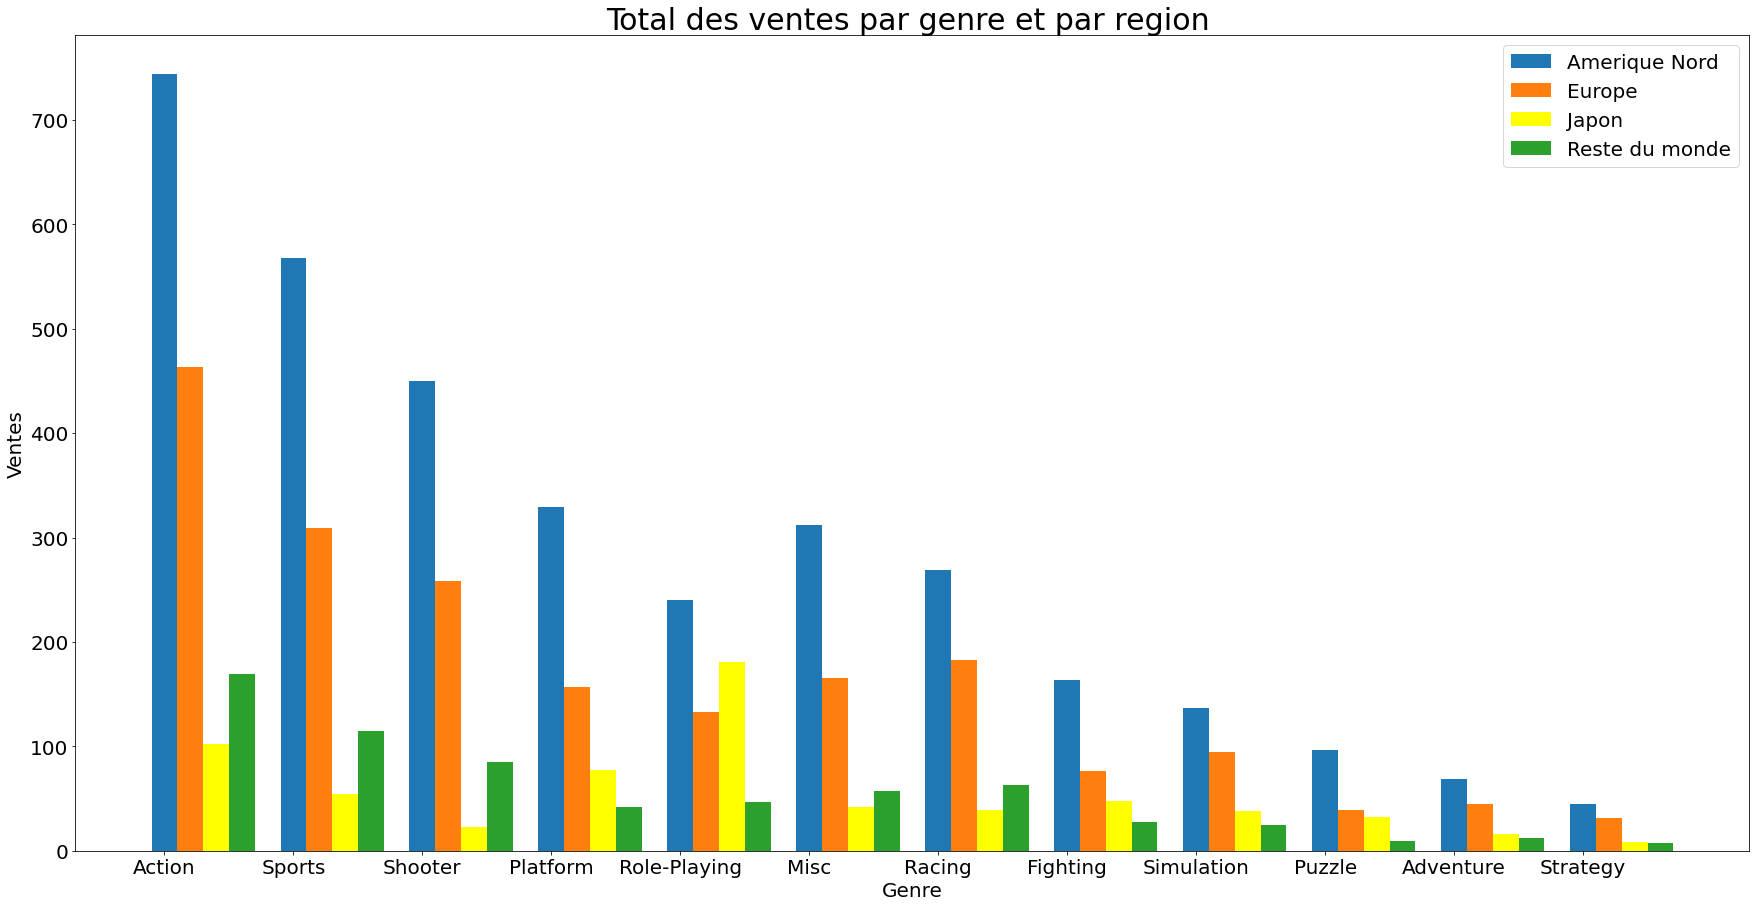

In [13]:
liste_genre=salesByGenre_global.index.tolist()
nb_genre=len(liste_genre)
plt.figure(figsize = (30,15))
barWidth = 0.2
x1=range(nb_genre)
x2=[barWidth + num for num in x1]
x3=[barWidth + num for num in x2]
x4=[barWidth + num for num in x3]


plt.bar(x1,salesByGenre_global.NA_Sales, label="Amerique Nord",width=barWidth)
plt.bar(x2,salesByGenre_global.EU_Sales, label="Europe",width=barWidth)
plt.bar(x3,salesByGenre_global.JP_Sales, label="Japon",width=barWidth,color = 'yellow')
plt.bar(x4,salesByGenre_global.Other_Sales, label="Reste du monde",width=barWidth)

plt.xlabel('Genre',fontsize=20)
plt.ylabel('Ventes',fontsize=20)
plt.xticks(range(12), liste_genre,fontsize=20)
plt.yticks(fontsize=20)
plt.title('Total des ventes par genre et par region ', fontsize=30)
plt.legend(fontsize=20);



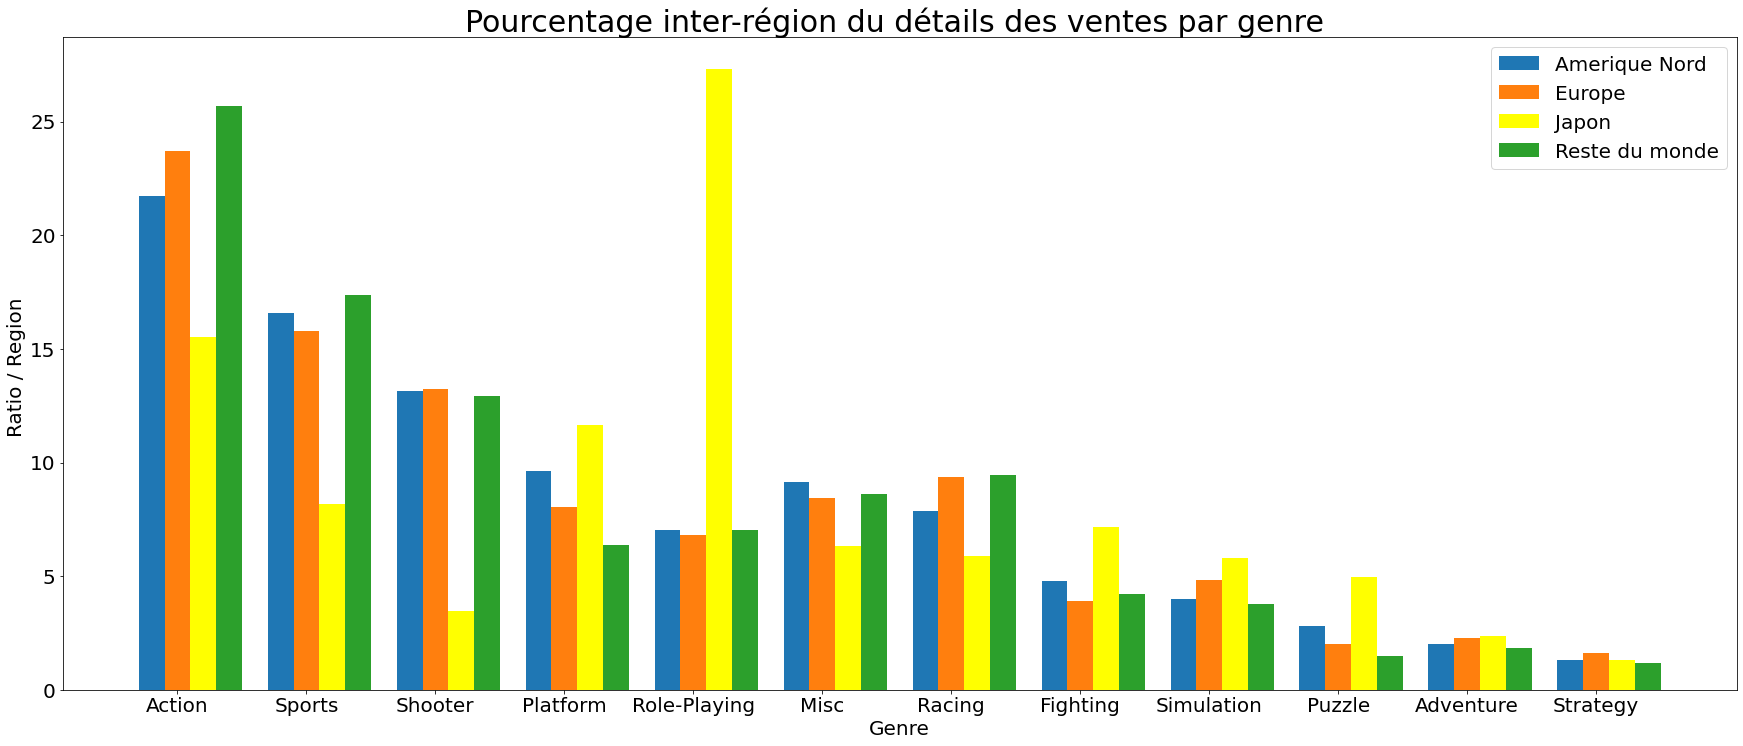

In [14]:
liste_genre=salesByGenre_global.index.tolist()
nb_genre=len(liste_genre)
plt.figure(figsize = (30,12))
barWidth = 0.2
x1=range(nb_genre)
x1=[-barWidth + num for num in x1]
x2=[barWidth + num for num in x1]
x3=[barWidth + num for num in x2]
x4=[barWidth + num for num in x3]


plt.bar(x1,salesByGenre_global.NA_Ratio, label="Amerique Nord",width=barWidth)
plt.bar(x2,salesByGenre_global.EU_Ratio, label="Europe",width=barWidth)
plt.bar(x3,salesByGenre_global.JP_Ratio, label="Japon",width=barWidth,color = 'yellow')
plt.bar(x4,salesByGenre_global.OT_Ratio, label="Reste du monde",width=barWidth)

plt.xlabel('Genre',fontsize=20)
plt.ylabel('Ratio / Region ',fontsize=20)
plt.xticks(range(12), liste_genre,fontsize=20)
plt.yticks(fontsize=20)
plt.title('Pourcentage inter-région du détails des ventes par genre ', fontsize=30)
plt.legend(fontsize=20);


In [15]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()
p = figure(plot_width=800,plot_height=700,title='Correlation entre notes et ventes',x_axis_label="Note attribuée sur 100",y_axis_label="Ventes ")
source = ColumnDataSource(salesByName)
x = salesByName['metaNote']
y = salesByName['Global_Sales']

r=p.circle('metaNote','Global_Sales',size=5, color='blue',hover_color = 'red',     # couleur du point survolé par le curseur de la souris.
             hover_alpha = 0.5,source=source)

h = HoverTool(renderers = [r],               
        tooltips = [("Jeu,Genre,Editeur,note,ventes", "@Name  /    @Genre  /   @Publisher  /  @metaNote  /  @Global_Sales")])
                                                 
# Ajout du HoverTool aux outils de la figure

p.add_tools(h)
show(p)

Loading BokehJS ...